## Comparisons, Masking Images, and Machine Learning

In [8]:
%run ../lib/spectral_lib.py
from matplotlib import pyplot as plt
%matplotlib inline 

In [9]:
# Data path relative to this location.
base_path = '../data/imagesets'

image_list = []
sample_list = []
key_list = []

grayscale_list = []
grayscale_dict = {}
NDVI_list = []
NDVI_dict = {}
GNDVI_list = []
GNDVI_dict = {}

ymd1 = '/2017-04-25/'
ymd2 = '/2017-05-10/'
ymd3 = '/2017-05-25/'
ymd4 = '/2017-07-28/'
ymd5 = '/2017-09-10/'
ymd6 = '/2017-11-13/'

In [10]:
image_list.append((ymd1, '002_1'))
image_list.append((ymd1, '009_1'))
image_list.append((ymd1, '029_3'))

In [11]:
for idx in range(len(image_list)):
    sample_list.append(get_path2(base_path, image_list[idx][0], image_list[idx][1]))

for idx in range(len(sample_list)):
    grayscale_list.append(get_greyscale(sample_list[idx][0], sample_list[idx][1], sample_list[idx][2]))
    key_list.append(str(image_list[idx][0][1:-1]) + '_' + str(image_list[idx][1]))
    grayscale_dict[key_list[idx]] = grayscale_list[idx]
    
for idx in range(len(sample_list)):
    NDVI_list.append(calc_ndvi(grayscale_dict[key_list[idx]]))
    GNDVI_list.append(calc_gndvi(grayscale_dict[key_list[idx]]))
    
for idx in range(len(key_list)):
    NDVI_dict[key_list[idx]] = calc_ndvi(grayscale_dict[key_list[idx]])
    GNDVI_dict[key_list[idx]] = calc_gndvi(grayscale_dict[key_list[idx]])

In [12]:
GNDVI_keys = list(GNDVI_dict) # 'GNDVI_dict' is type dict_key
NDVI_keys  = list(NDVI_dict)

In [13]:
from scipy import stats

stat_ndvi = {}
stat_gndvi = {}

for idx in range(len(key_list)):
    flat_ndvi = NDVI_dict[key_list[idx]].flatten()
    flat_gndvi = GNDVI_dict[key_list[idx]].flatten()
    
    stat_ndvi[key_list[idx]] = ( round(stats.tmean(flat_ndvi), 2),
                                 round(stats.tmin(flat_ndvi), 3), 
                                 round(stats.tmax(flat_ndvi), 3),
                                 round(stats.tstd(flat_ndvi), 2))
    
    stat_gndvi[key_list[idx]] = ( round(stats.tmean(flat_gndvi), 2),
                                 round(stats.tmin(flat_gndvi), 3), 
                                 round(stats.tmax(flat_gndvi), 3),
                                 round(stats.tstd(flat_gndvi), 2))

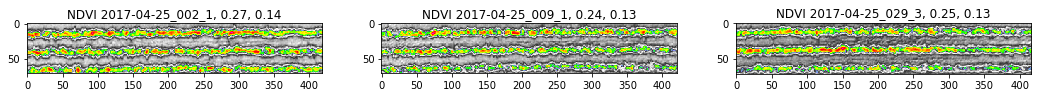

In [14]:
#plt.gcf().clear()
#plt.style.use('default') # switch back to default matplotlib style

fig = plt.figure(figsize=(18, 5))

for idx in range(len(key_list)):
    plt.subplot(int('33' + str(idx+1)))
    plt.title('NDVI ' + str(key_list[idx]) + ', ' +
              str(stat_ndvi[key_list[idx]][0]) + ', ' + 
              str(stat_ndvi[key_list[idx]][3]) 
             )
    plt.imshow(NDVI_dict[key_list[idx]], cmap=fastie_lut_cmap)
fig = plt.gcf()
#fig.savefig('../readme_resources/img/multiples_123_NDVI.png', format='png')

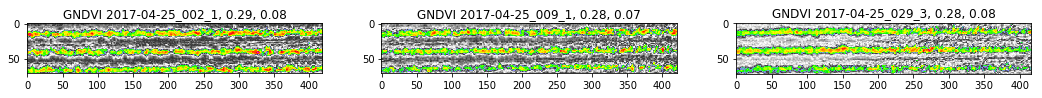

In [15]:
#plt.gcf().clear()
#plt.style.use('default') # switch back to default matplotlib style

fig = plt.figure(figsize=(18, 5))

for idx in range(len(key_list)):
    plt.subplot(int('33' + str(idx+1))) # this works ONLY for a 3x3 grid
    plt.title('GNDVI ' + str(key_list[idx]) + ', ' +
              str(stat_gndvi[key_list[idx]][0]) + ', ' + 
              str(stat_gndvi[key_list[idx]][3]) 
             )
    plt.imshow(GNDVI_dict[key_list[idx]], cmap=fastie_lut_cmap)
fig = plt.gcf()
#fig.savefig('../readme_resources/img/multiples_123_NDVI.png', format='png')

In [16]:
# Choose appropriate plot style
print(plt.style.available)

['grayscale', 'seaborn-darkgrid', 'classic', 'seaborn-talk', 'ggplot', 'seaborn-poster', 'seaborn-whitegrid', 'seaborn', 'seaborn-bright', 'seaborn-white', 'seaborn-pastel', 'seaborn-notebook', 'seaborn-ticks', 'dark_background', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-colorblind', 'bmh', 'seaborn-paper', 'seaborn-dark', 'seaborn-muted', 'seaborn-deep']


#### PLOT NDVI against GNDVI

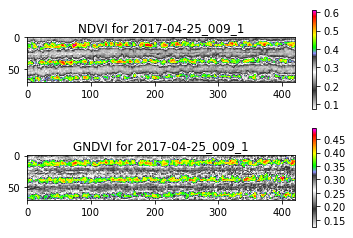

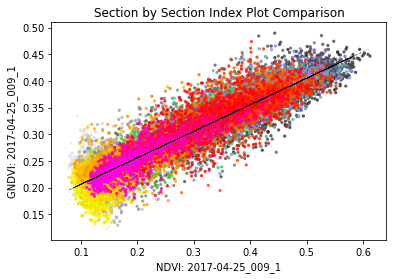

In [17]:
# PLOT NDVI against GNDVI

from matplotlib import style
from pylab import polyfit, poly1d

use_key = 0

#style.use('ggplot')

X = NDVI_dict[NDVI_keys[use_key]].flatten()
Y = GNDVI_dict[GNDVI_keys[use_key]].flatten()
T = np.arange(len(X))
#T = np.arctan2(Y,X)

fig = plt.figure()

plt.subplot(211)
plt.title('NDVI for ' + NDVI_keys[use_key])
plt.imshow(NDVI_dict[NDVI_keys[use_key]], cmap=fastie_lut_cmap)
plt.colorbar(orientation='vertical')

plt.subplot(212)
plt.title('GNDVI for ' + GNDVI_keys[use_key])
plt.imshow(GNDVI_dict[GNDVI_keys[use_key]], cmap=fastie_lut_cmap)
plt.colorbar(orientation='vertical')

if (len(X) == len(Y) == len(T)):
    
    fig, ax = plt.subplots()
    fit = np.polyfit(X, Y, deg=1)
    ax.plot(X, fit[0] * X + fit[1], color='#000011', linestyle=':', lw=.1)

    ax.set_title("Section by Section Index Plot Comparison")
    ax.set_xlabel('NDVI: ' + NDVI_keys[use_key])
    ax.set_ylabel('GNDVI: ' + GNDVI_keys[use_key])

    ax.scatter(X,Y, s=5, c=T, alpha=.8, cmap=fastie_lut_cmap)
    #fig.set_size_inches(5, 5, forward=True)
    plt.show()

#fig.savefig('../readme_resources/img/multiples_123_NDVI.png', format='png')

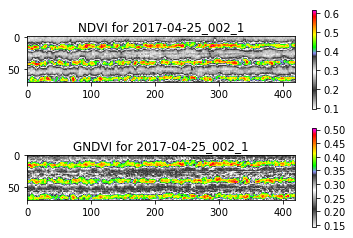

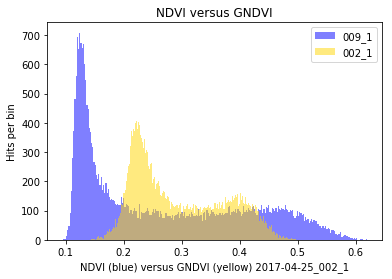

In [18]:
#plt.gcf().clear()
#plt.style.use('default') # switch back to default matplotlib style

fig = plt.figure()

use_key = 1

plt.subplot(211)
plt.title('NDVI for ' + NDVI_keys[use_key])
plt.imshow(NDVI_dict[NDVI_keys[use_key]], cmap=fastie_lut_cmap)
plt.colorbar(orientation='vertical')

plt.subplot(212)
plt.title('GNDVI for ' + GNDVI_keys[use_key])
plt.imshow(GNDVI_dict[GNDVI_keys[use_key]], cmap=fastie_lut_cmap)
plt.colorbar(orientation='vertical')
fig, ax = plt.subplots(sharex=True)

ax.hist(NDVI_dict[NDVI_keys[use_key]].ravel(), bins=256, color='b', alpha=0.5, label=NDVI_keys[0][11:])
ax.hist(GNDVI_dict[GNDVI_keys[use_key]].ravel(), bins=256, color='gold', alpha=0.5, stacked= True, label=NDVI_keys[1][11:])
plt.legend()
plt.ylabel('Hits per bin')
plt.xlabel('NDVI (blue) versus GNDVI (yellow) ' + NDVI_keys[use_key])
ax.set_title('NDVI versus GNDVI')
#fig = plt.gcf()
#fig.savefig('../readme_resources/img/hist_NDVI_GNDVI.png', format='png')

plt.show()

In [19]:
NDVI_keys

['2017-04-25_009_1', '2017-04-25_002_1', '2017-04-25_029_3']

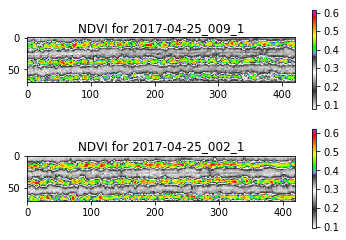

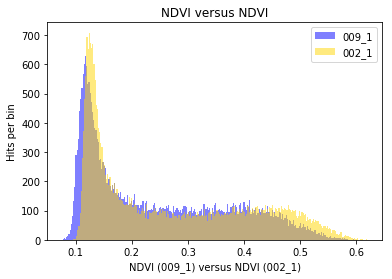

In [20]:
#plt.gcf().clear()
#plt.style.use('default') # switch back to default matplotlib style

fig = plt.figure()

plt.subplot(211)
plt.title('NDVI for ' + NDVI_keys[0])
plt.imshow(NDVI_dict[NDVI_keys[0]], cmap=fastie_lut_cmap)
plt.colorbar(orientation='vertical')

plt.subplot(212)
plt.title('NDVI for ' + NDVI_keys[1])
plt.imshow(NDVI_dict[NDVI_keys[1]], cmap=fastie_lut_cmap)
plt.colorbar(orientation='vertical')
fig, ax = plt.subplots(sharex=True)

ax.hist(NDVI_dict[NDVI_keys[0]].ravel(), bins=256, color='b', alpha=0.5, label=NDVI_keys[0][11:])
ax.hist(NDVI_dict[NDVI_keys[1]].ravel(), bins=256, color='gold', alpha=0.5, stacked= True, label=NDVI_keys[1][11:])
plt.legend()
plt.ylabel('Hits per bin')
#plt.xlabel('NDVI (blue) versus NDVI (yellow) ' + NDVI_keys[use_key])

plt.xlabel('NDVI (' + NDVI_keys[0][11:] + ') versus NDVI (' + NDVI_keys[1][11:] +  ')' ) 

ax.set_title('NDVI versus NDVI')
#fig = plt.gcf()
#fig.savefig('../readme_resources/img/hist_NDVI_GNDVI.png', format='png')

plt.show()

In [14]:
"""
Perform cluster-based image thresholding. The algorithm 'threshold_minimum' assumes that the image contains 
two pixel classes (foreground and background). It calculates the optimum threshold separating the two so that 
their inter-class variance is maximal. Here I use it backwards: I'm masking the more prevalent pixel value 
(the non-photosynthetic part).   

"""
from skimage.filters import threshold_minimum

thresh_min_NDVI = {}
thresh_min_GNDVI = {}
threshold_filtered_NDVI_dict = {}
threshold_filtered_GNDVI_dict = {}

try:
    for idx in range(len(key_list)):
        thresh_min_NDVI[key_list[idx]] = threshold_minimum(NDVI_dict[key_list[idx]])
        
        threshold_filtered_NDVI_dict[key_list[idx]] = filter_to_threshold(
                                                        NDVI_dict[key_list[idx]], 
                                                        thresh_min_NDVI[key_list[idx]])
        
        thresh_min_GNDVI[key_list[idx]] = threshold_minimum(GNDVI_dict[key_list[idx]])
        
        threshold_filtered_GNDVI_dict[key_list[idx]] = filter_to_threshold(
                                                        GNDVI_dict[key_list[idx]], 
                                                    thresh_min_GNDVI[key_list[idx]])
except RuntimeError:
    print (key_list[idx])
    
    

In [15]:
temp_dict1 = {}
temp_dict2 = {}

new_NDVI_dict = {}
new_GNDVI_dict = {}

for idx in range(len(key_list)):
    temp_dict1[key_list[idx]] = get_threshold_filter(NDVI_dict[key_list[idx]], threshold_filtered_NDVI_dict[key_list[idx]])
    new_NDVI_dict[key_list[idx]] = np.ma.masked_equal(temp_dict1[key_list[idx]],0)

for idx in range(len(key_list)):
    temp_dict2[key_list[idx]] = get_threshold_filter(GNDVI_dict[key_list[idx]], threshold_filtered_GNDVI_dict[key_list[idx]])
    new_GNDVI_dict[key_list[idx]] = np.ma.masked_equal(temp_dict2[key_list[idx]],0)

In [16]:
from scipy import stats

stat_ndvi = {}
stat_gndvi = {}

for idx in range(len(key_list)):
    flat_ndvi = new_NDVI_dict[key_list[idx]].flatten()
    flat_ndvi = flat_ndvi[~flat_ndvi.mask] # remove masked elements for statistics
    stat_ndvi[key_list[idx]] = ( round(stats.tmean(flat_ndvi), 2),
                                 round(stats.tmin(flat_ndvi), 3), 
                                 round(stats.tmax(flat_ndvi), 3),
                                 round(stats.tstd(flat_ndvi), 2))

for idx in range(len(key_list)):
    flat_gndvi = new_GNDVI_dict[key_list[idx]].flatten()
    flat_gndvi = flat_gndvi[~flat_gndvi.mask] # remove masked elements for statistics
    stat_gndvi[key_list[idx]] = ( round(stats.tmean(flat_gndvi), 2),
                                 round(stats.tmin(flat_gndvi), 3), 
                                 round(stats.tmax(flat_gndvi), 3),
                                 round(stats.tstd(flat_gndvi), 2))

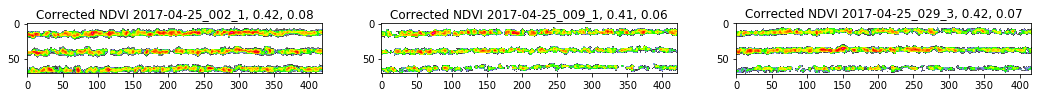

In [17]:
#plt.style.use('default') # switch back to default matplotlib style

fig = plt.figure(figsize=(18, 5))

for idx in range(len(key_list)):
    plt.subplot(int('33' + str(idx+1))) # this works ONLY for a 3x3 grid
    plt.title('Corrected NDVI ' + str(key_list[idx]) + ', ' +
              str(stat_ndvi[key_list[idx]][0]) + ', ' + 
              str(stat_ndvi[key_list[idx]][3]) 
             )
    plt.imshow(temp_dict1[key_list[idx]], cmap=fastie_lut_cmap)
fig = plt.gcf()
#fig.savefig('../readme_resources/img/multiples_123_NDVI.png', format='png')